<h1>Para este Hackaton</h1>

<p>Nuestro equipo ha optado por realizar una actializacion de nuestra web-app previamente presentada. Esta web app se encarga de realizar predicciones meteorologicas en base a una serie de datos proporcionados a travez de un formulario; automatizado gracias a un modelo de machine learning entrenado usando el metodo de arboles aleatorios <strong><<"Random Forest">></strong>.</p>

<p>Con esta actualizacion lo que se quiere lograr es, implementar un segundo modelo que pueda llevar a cabo dichas predicciones, pero con una premisa un poco diferente, y es que este nuevo modelo realizara dichas predicciones con datos que seran un poco mas complicados de manejar, es decir, imagenes.</p>

<p>Lo que se quiere lograr con esta implementacion es fomentar aun mas la portabilidad de nuestra app, permitiendo realizar predicciones sin necesidad de una abrumadora cantidad de datos.</p>

<h3>Primero cargamos las imagenes para saber si todo el directorio se encuentra en orden
</h3>

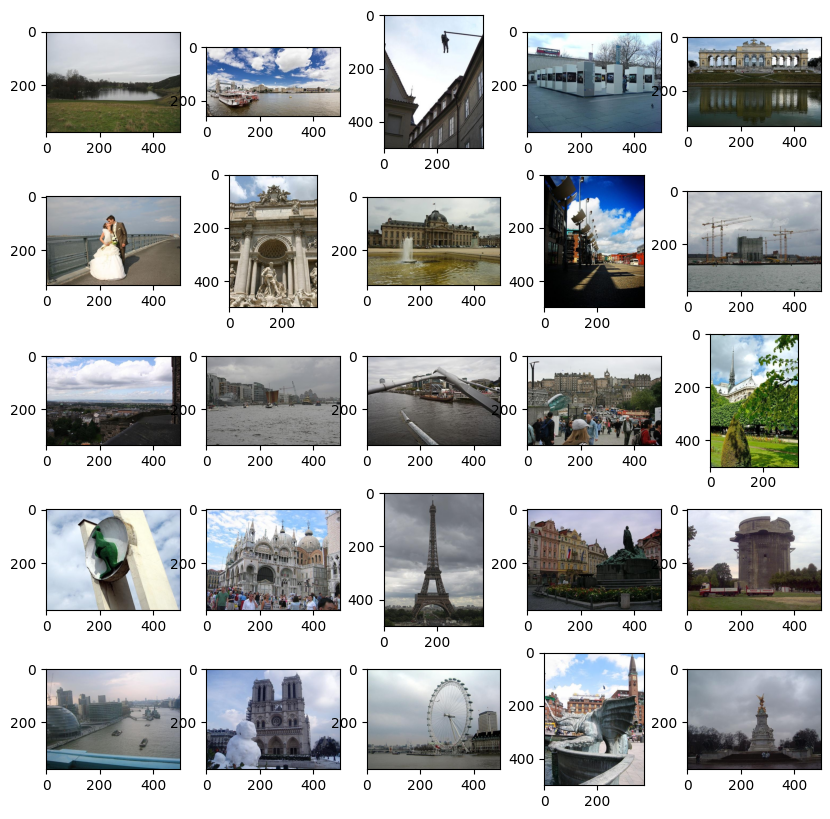

In [10]:
import os 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

carpeta="img_source/0"

plt.figure(figsize=(10,10))

img = os.listdir(carpeta)

for i, img_name in enumerate(img[:25]):
    plt.subplot(5,5,i+1)
    imagen=mpimg.imread(carpeta+"/"+img_name)
    plt.imshow(imagen) 

<h3>Creamos nuestras funciones claves encargadas del manejo de imagenes</h3>

In [1]:
import cv2 as cv
import numpy as np
import os
from tqdm import tqdm
from pathlib import Path

def read_image(clase: str, path_class: str) -> tuple:

    lista_imagenes = []
    lista_targets = []
    print(f'********* guardando clase {clase} *********')
    for img in tqdm(os.listdir(path_class), desc=f"Cargando {clase}"):
        path_img = path_class + "/" + img
        img = cv.imread(path_img, cv.IMREAD_COLOR)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        lista_imagenes.append(img)
        lista_targets.append(clase)
    return lista_imagenes, lista_targets

def resize_image(img):

    resized_image = cv.resize(img, (224, 224))

    resized_image = resized_image.astype(np.float32) / 255.0
    
    return resized_image

def process_dataset(weather_types, path_rute):

    l_img = []
    l_target = []
    

    for clase, ruta_clase in zip(weather_types, path_rute):
        lista_imagenes, lista_labels = read_image(clase, ruta_clase)
        l_img.extend(lista_imagenes)
        l_target.extend(lista_labels)

    print("\nRedimensionando imágenes a 224x224...")
    l_img_resize = [resize_image(img) for img in tqdm(l_img, desc="Redimensionando")]
    
    return np.array(l_img_resize), np.array(l_target)

<h3>Revisamos y generamos las rutas a utilizar</h3>

In [2]:
weather_path="img_source"

weather_types=os.listdir(weather_path)

path_rute = [weather_path + '/' + class_soil for class_soil in weather_types]
path_rute

['img_source/0', 'img_source/1', 'img_source/2', 'img_source/3']

In [3]:
for i in range(len(weather_types)):
  print(f'clase es {weather_types[i]} ruta es ::: {path_rute[i]}')

clase es 0 ruta es ::: img_source/0
clase es 1 ruta es ::: img_source/1
clase es 2 ruta es ::: img_source/2
clase es 3 ruta es ::: img_source/3


<h3>Cargamos los datos</h3>

In [4]:
X_data, y_labels = process_dataset(weather_types, path_rute)


********* guardando clase 0 *********


Cargando 0: 100%|██████████| 1000/1000 [00:27<00:00, 36.44it/s]


********* guardando clase 1 *********


Cargando 1: 100%|██████████| 1000/1000 [00:24<00:00, 41.36it/s]


********* guardando clase 2 *********


Cargando 2: 100%|██████████| 1000/1000 [00:36<00:00, 27.74it/s]


********* guardando clase 3 *********


Cargando 3: 100%|██████████| 1000/1000 [00:31<00:00, 31.31it/s]



Redimensionando imágenes a 224x224...


Redimensionando: 100%|██████████| 4000/4000 [00:09<00:00, 403.54it/s]


<h3>Distribuimos los datos para las distintas fases del entrenamiento</h3>

In [5]:

from sklearn.model_selection import train_test_split
import numpy as np


X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_data, 
    y_labels,
    test_size=0.2,  
    random_state=42,  
    stratify=y_labels  
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=0.25,  
    random_state=42,
    stratify=y_train_val
)


print("Formas de los conjuntos de datos:")
print(f"X_train: {X_train.shape} - y_train: {y_train.shape}")
print(f"X_val: {X_val.shape} - y_val: {y_val.shape}")
print(f"X_test: {X_test.shape} - y_test: {y_test.shape}")


print("\nDistribución de clases:")
for dataset_name, y_data in [("Entrenamiento", y_train), 
                            ("Validación", y_val), 
                            ("Prueba", y_test)]:
    unique, counts = np.unique(y_data, return_counts=True)
    print(f"\n{dataset_name}:")
    for class_label, count in zip(unique, counts):
        print(f"  Clase {class_label}: {count} imágenes ({count/len(y_data)*100:.2f}%)")

Formas de los conjuntos de datos:
X_train: (2400, 224, 224, 3) - y_train: (2400,)
X_val: (800, 224, 224, 3) - y_val: (800,)
X_test: (800, 224, 224, 3) - y_test: (800,)

Distribución de clases:

Entrenamiento:
  Clase 0: 600 imágenes (25.00%)
  Clase 1: 600 imágenes (25.00%)
  Clase 2: 600 imágenes (25.00%)
  Clase 3: 600 imágenes (25.00%)

Validación:
  Clase 0: 200 imágenes (25.00%)
  Clase 1: 200 imágenes (25.00%)
  Clase 2: 200 imágenes (25.00%)
  Clase 3: 200 imágenes (25.00%)

Prueba:
  Clase 0: 200 imágenes (25.00%)
  Clase 1: 200 imágenes (25.00%)
  Clase 2: 200 imágenes (25.00%)
  Clase 3: 200 imágenes (25.00%)


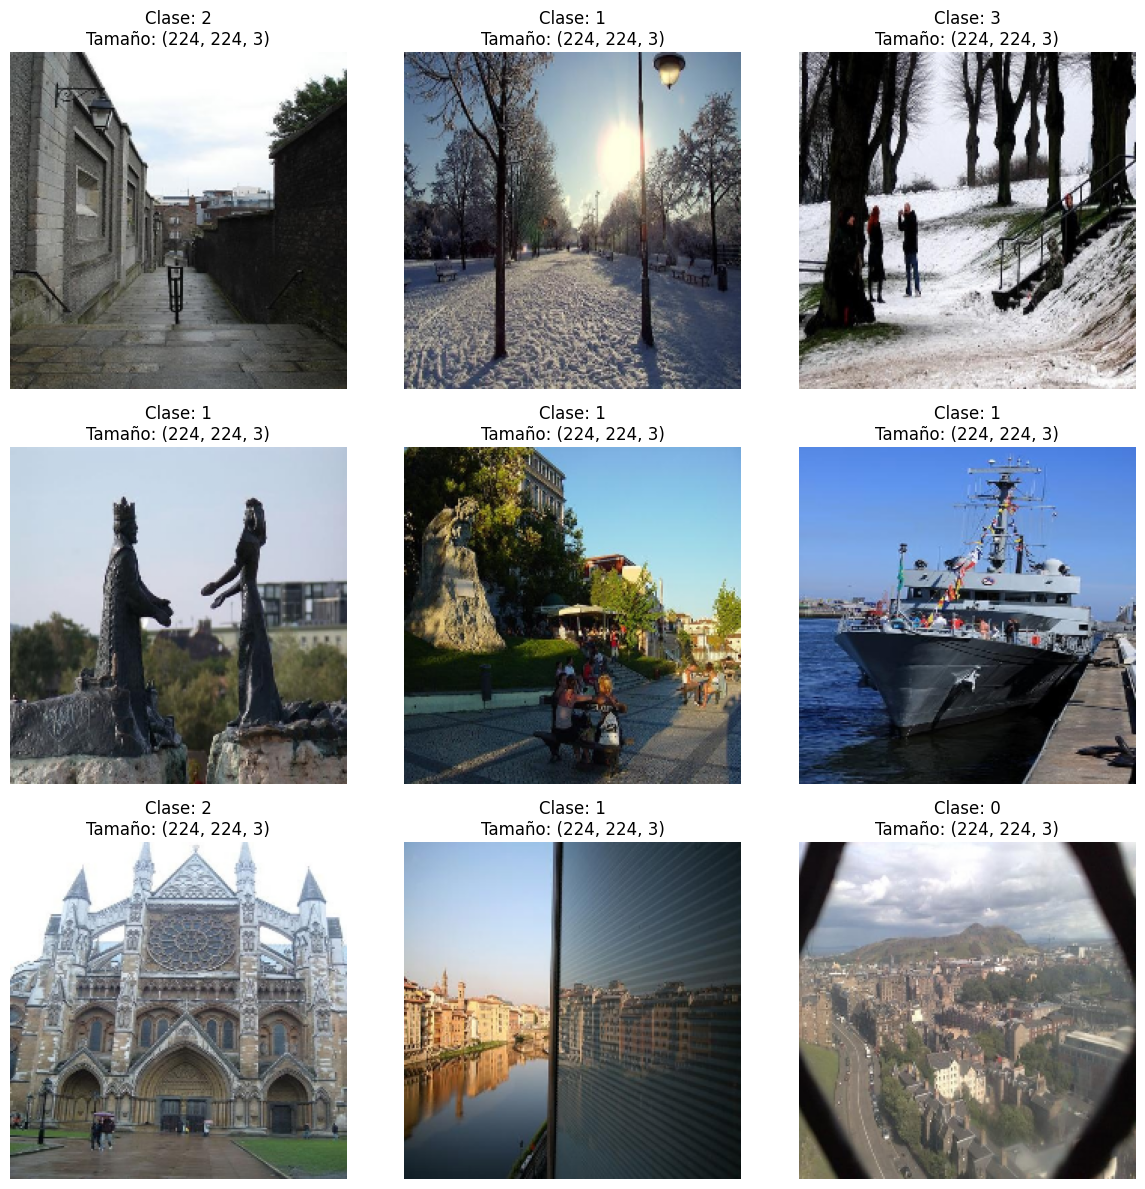

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))


for i in range(9):
    idx = np.random.randint(0, len(X_train))
    img = X_train[idx]

    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f'Clase: {y_train[idx]}\nTamaño: {img.shape}')
    plt.axis('off')

plt.tight_layout()

plt.show()



<h3>Generamos y entrenamos el modelo</h3>

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import Model
import numpy as np
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)


class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapeo de clases:")
for clase, numero in class_mapping.items():
    print(f"{clase} -> {numero}")


data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    fill_mode='nearest'
)


base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

for layer in base_model.layers[-30:]:
    layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(len(class_mapping), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=8,
        restore_best_weights=True,
        verbose=1
    ),
    ModelCheckpoint(
        'mejor_modelo_clima_v2.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=4,
        min_lr=1e-6,
        verbose=1
    )
]

# 7. Entrenar el modelo
history = model.fit(
    data_gen.flow(X_train, y_train_encoded, batch_size=32),
    validation_data=(X_val, y_val_encoded),
    steps_per_epoch=len(X_train) // 32,
    epochs=20,
    callbacks=callbacks,
    verbose=1
)


test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=1)
print(f"\nPrecisión final en el conjunto de prueba: {test_accuracy*100:.2f}%")



Mapeo de clases:
0 -> 0
1 -> 1
2 -> 2
3 -> 3


c:\Users\USUARIO\Documents\Algoritmos\Python\Hackaton\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.2783 - loss: 2.1352
Epoch 1: val_accuracy improved from -inf to 0.44250, saving model to mejor_modelo_clima_v2.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 621s 7s/step - accuracy: 0.2793 - loss: 2.1307 - val_accuracy: 0.4425 - val_loss: 1.1842 - learning_rate: 1.0000e-04
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4678 - loss: 1.3395
Epoch 2: val_accuracy improved from 0.44250 to 0.59500, saving model to mejor_modelo_clima_v2.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 500s 7s/step - accuracy: 0.4683 - loss: 1.3379 - val_accuracy: 0.5950 - val_loss: 0.9822 - learning_rate: 1.0000e-04
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5833 - loss: 1.0498
Epoch 3: val_accuracy improved from 0.59500 to 0.64250, saving model to mejor_modelo_clima_v2.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 501s 7s/step - accuracy: 0.5836 - loss: 1.0490 - val_accuracy: 0.6425 - val_loss: 0.8997 - learning_rate: 1.0000e-04
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6725 - loss: 0.8650
Epoch 4: val_accuracy improved from 0.64250 to 0.71875, saving model to mejor_modelo_clima_v2.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 498s 7s/step - accuracy: 0.6726 - loss: 0.8648 - val_accuracy: 0.7188 - val_loss: 0.7752 - learning_rate: 1.0000e-04
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7340 - loss: 0.7140
Epoch 5: val_accuracy did not improve from 0.71875
75/75 ━━━━━━━━━━━━━━━━━━━━ 494s 7s/step - accuracy: 0.7340 - loss: 0.7141 - val_accuracy: 0.7138 - val_loss: 0.8045 - learning_rate: 1.0000e-04
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7553 - loss: 0.6370
Epoch 6: val_accuracy improved from 0.71875 to 0.74000, saving model to mejor_modelo_clima_v2.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 495s 7s/step - accuracy: 0.7553 - loss: 0.6371 - val_accuracy: 0.7400 - val_loss: 0.7371 - learning_rate: 1.0000e-04
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7898 - loss: 0.5788
Epoch 7: val_accuracy did not improve from 0.74000
75/75 ━━━━━━━━━━━━━━━━━━━━ 497s 7s/step - accuracy: 0.7900 - loss: 0.5785 - val_accuracy: 0.7237 - val_loss: 0.7965 - learning_rate: 1.0000e-04
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8212 - loss: 0.5091
Epoch 8: val_accuracy did not improve from 0.74000
75/75 ━━━━━━━━━━━━━━━━━━━━ 486s 6s/step - accuracy: 0.8210 - loss: 0.5093 - val_accuracy: 0.6950 - val_loss: 1.0387 - learning_rate: 1.0000e-04
Epoch 9/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8125 - loss: 0.4837
Epoch 9: val_accuracy did not improve from 0.74000
75/75 ━━━━━━━━━━━━━━━━━━━━ 486s 6s/step - accuracy: 0.8127 - loss: 0.4834 - val_accuracy: 0.7138 - val_loss: 0.9082 - learning_rate: 1.0000e-04
Epoch 10/20
75/75 ━━━━

<h3>Generamos las distintas salidas</h3>

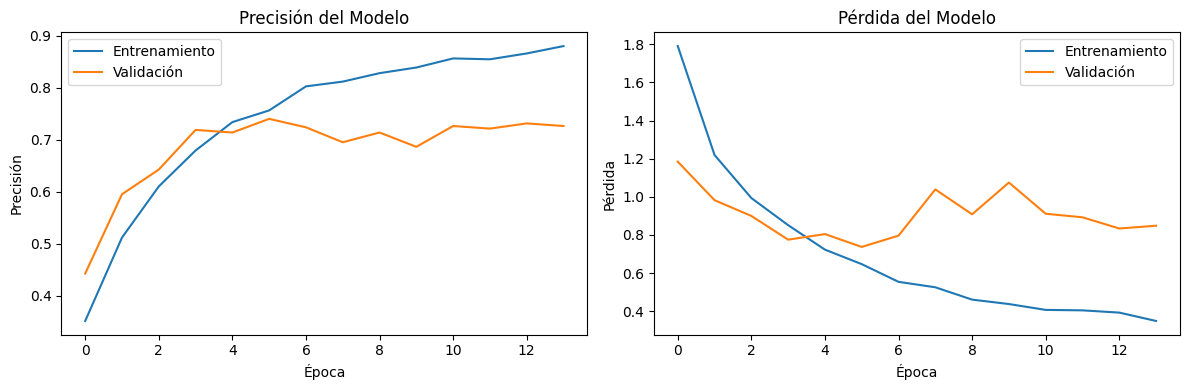

25/25 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step


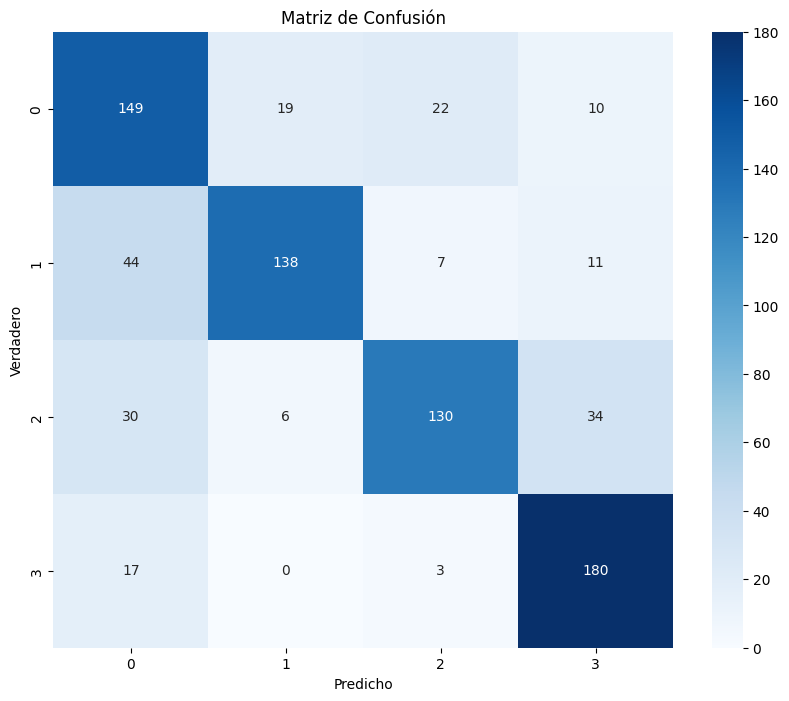

In [12]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


cm = confusion_matrix(y_test_encoded, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.show()


<h3>Pequeño testeo</h3>

In [11]:

# Mostrar reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test_encoded, y_pred_classes))


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.62      0.74      0.68       200
           1       0.85      0.69      0.76       200
           2       0.80      0.65      0.72       200
           3       0.77      0.90      0.83       200

    accuracy                           0.75       800
   macro avg       0.76      0.75      0.75       800
weighted avg       0.76      0.75      0.75       800



In [ ]:
model.save_weights(".weights.h5")

In [3]:
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

modelo_path="mejor_modelo_clima_v2.h5"
pesos_path=".weights.h5"

cnn=load_model(modelo_path)
cnn.load_weights(pesos_path)


c:\Users\USUARIO\Documents\Algoritmos\Python\Hackaton\venv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 330 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [11]:
import numpy as np
def predict(file):
    x=load_img(file, target_size=(224,224))
    x=img_to_array(x)
    x=np.expand_dims(x, axis=0)
    arreglo=cnn.predict(x)
    resultado=arreglo[0]
    respuesta=np.argmax(resultado)
    if respuesta==0:
        print("La imagen es de tipo nublado")
    elif respuesta==1:
        print("La imagen es de tipo soleado")
    elif respuesta==2:
        print("La imagen es de tipo lluvioso")
    else:
        print("La imagen es de tipo nevado")


In [14]:
predict("img_source/3/3579221972.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
La imagen es de tipo nevado
